<a href="https://colab.research.google.com/github/ktongk/BTT-JPMC-1/blob/main/scrape_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtaining a list of equities tickers and the corresponding timeseries

In [1]:
! pip3 install yfinance 


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip3 install numpy


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
! pip3 install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
! pip install pandas-datareader


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<h2>What do if you get the cannot be resolved from source (pylance)</h2>
path\to\your\virtualenv\Scripts\deactivate (deactivate ur venv)
delete the virtual enviornment that ur currently working in
python -m venv myvenv in terminal
myvenv\Scripts\activate
then install the packages pip install ___ in terminal
crtl+shift+P and then select python interpreter
select myvenv (or new name for venv)
restart kernel and restart vscode

In [5]:
import os
import json
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import matplotlib.pyplot as plt


from datetime import datetime
''
# this workaround let's us override pandas_datareader with yfinance,
# although we can also use yfinance directly
import yfinance as yf
import pandas_datareader.data as web; yf.pdr_override()

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
start_date = '2022-01-01'
end_date  = '2022-12-31'

data_dir = '/Users/sofia/Onedrive/Documents/Github/BTT-JPMC-1'

#A Timeline on the SVB Crash and why we Chose it

According to Investopedia, SVB Financial Group was removed from the S&P 500 Index due to the collapse its bank. So the most recent rebalancing of S&P 500 was announced on March 10, 2023.

The bank, mostly focused on venture capital funds and small tech startups had a huge boom during the pandemic. The bank then invested all of its profits into low-return bonds. However, after aggresive federal rate hikes the bonds quickly lost their value, causing panic. SVB no longer had the cash to give to the companies withdrawing their money and the FDIC took over the bank.







Initally the FDIC could only insure up to 250k but that wasn't enough, causing fear of a 2008 recession. The fed, treasury, and FDIC then announced a new emergency lending program so every company could get their money back.

##Timeseries Length
originally we were going to do the entire month of march but because there was a distinct end it didn't seem necesarry to do the full month. We decided to do a week before SVB announced their losses and then around a week after the emergency lending program was announced

##What other events did we consider?



We wanted to pick an event that had both positive and negative affects on the S&P500 companies and had a distinct beginning and end.

We considered doing the pandemic but it was too long and the rise of chatgpt but there were too many factors to consider (3.5 release, 4.0 release, 3.5 gets worse)
https://arxiv.org/pdf/2307.09009.pdf

In [8]:
names = ['','SVB announces 1.8 billion loss on bonds', 'SVB shares fall 60%, depositors withdraw money',
         'FDIC takes over SVB only insures up to 250k', 'Fed, Tresury, & FDIC say theyll cover all deposits',
         'Bank stocks bounced back in early trading','',
        ]

dates_timeline = ['2023-03-07','2023-03-08', '2023-03-09', '2023-03-10',
             '2023-03-12', '2023-03-14','2023-03-15'
        ]

    # Convert date strings (e.g. 2014-10-18) to datetime
dates_timeline = [datetime.strptime(d, "%Y-%m-%d") for d in dates_timeline]

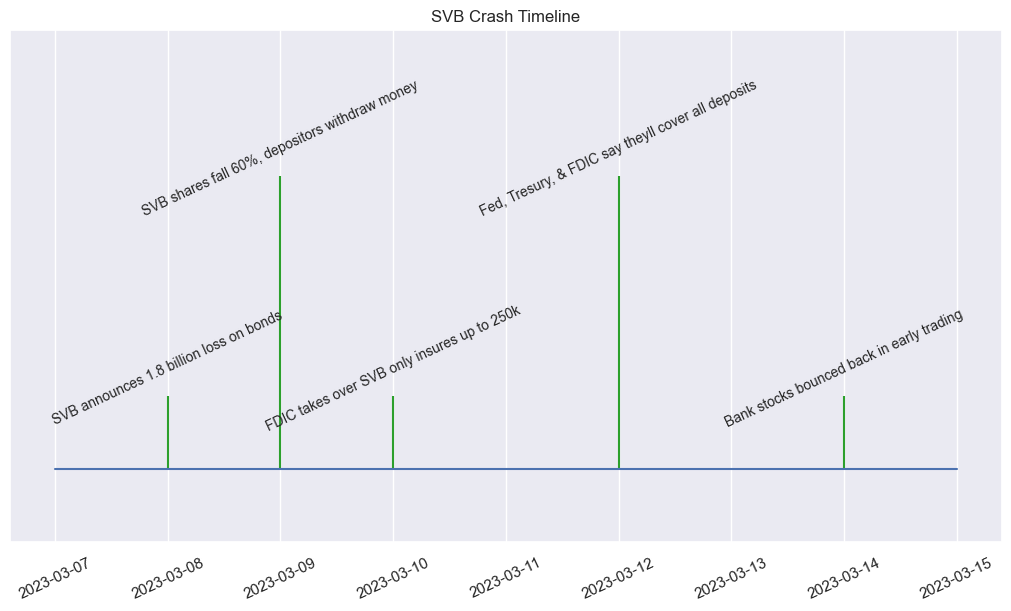

In [9]:
levels = np.tile([0, 1,4, 1, 4,1, 0], int(np.ceil(len(dates_timeline)/5)))[:len(dates_timeline)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
ax.set(title="SVB Crash Timeline")

ax.vlines(dates_timeline, 0, levels, color="tab:green")  # The vertical stems.
ax.plot(dates_timeline, np.zeros_like(dates_timeline))  # Baseline and markers on it.



for d, l, r in zip(dates_timeline, levels, names):
    ax.annotate(r, xy=(d, l), xytext=(0, 1* 20),# 0 means no horizontal offset and 1*20 means annotation will be 20 spaces from the end of the stem
                textcoords="offset points", horizontalalignment="center",
                verticalalignment="center", rotation=25, fontsize = 10)  # Rotate the text by 45 degrees

ax.set_ylim(-1, 6)
ax.yaxis.set_visible(False)
plt.xticks(rotation=25)
plt.show()

## Google trend search of the keyword "svb" 

In [10]:
'''
svb_google = pd.read_csv('svb_google_trend.csv')

import matplotlib.dates as mdates'''

"\nsvb_google = pd.read_csv('svb_google_trend.csv')\n\nimport matplotlib.dates as mdates"

In [11]:
'''
svb_google['Day'] = pd.to_datetime(svb_google['Day'])

# Filter the DataFrame to only include dates at a five-day interval
df_filtered = svb_google[svb_google['Day'].dt.day % 1 == 0]

x = df_filtered['Day']
y = df_filtered['SVB: (District of Columbia)']


# Create a DateFormatter object
date_formatter = mdates.DateFormatter('%m-%d')

# Set the DateFormatter as the major formatter for the x-axis
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.plot(x, y)

plt.xlabel('Date')
plt.ylabel('Interest Over Time')

plt.title('Interest over time of "SVB"')

plt.show()'''


'\nsvb_google[\'Day\'] = pd.to_datetime(svb_google[\'Day\'])\n\n# Filter the DataFrame to only include dates at a five-day interval\ndf_filtered = svb_google[svb_google[\'Day\'].dt.day % 1 == 0]\n\nx = df_filtered[\'Day\']\ny = df_filtered[\'SVB: (District of Columbia)\']\n\n\n# Create a DateFormatter object\ndate_formatter = mdates.DateFormatter(\'%m-%d\')\n\n# Set the DateFormatter as the major formatter for the x-axis\nplt.gca().xaxis.set_major_formatter(date_formatter)\n\nplt.plot(x, y)\n\nplt.xlabel(\'Date\')\nplt.ylabel(\'Interest Over Time\')\n\nplt.title(\'Interest over time of "SVB"\')\n\nplt.show()'

In [12]:
# df.head()

## Get list of companies in S&P500

We will obtain and store the list of the constituents from Wikipedia.

In [13]:
data    = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table_symbol   = data[0]
table_industry = data[0]['GICS Sector']
symbols = list(table_symbol.Symbol.values) ##companies
industries = list(table_industry.values) ##Industry Sector

symbols_industries_dict = {}
symbols_industries = data[0].iloc[:, [0,2]].values.tolist()
for pair in symbols_industries:
  keys, values = pair
  symbols_industries_dict[keys] = values

print("{} symbols in total".format(len(symbols)))

print(industries)



503 symbols in total
['Industrials', 'Industrials', 'Health Care', 'Health Care', 'Information Technology', 'Consumer Staples', 'Information Technology', 'Industrials', 'Utilities', 'Financials', 'Health Care', 'Consumer Discretionary', 'Materials', 'Information Technology', 'Industrials', 'Materials', 'Real Estate', 'Health Care', 'Industrials', 'Utilities', 'Financials', 'Communication Services', 'Communication Services', 'Consumer Staples', 'Consumer Discretionary', 'Materials', 'Information Technology', 'Utilities', 'Industrials', 'Utilities', 'Financials', 'Financials', 'Real Estate', 'Utilities', 'Financials', 'Industrials', 'Health Care', 'Information Technology', 'Information Technology', 'Information Technology', 'Financials', 'Energy', 'Information Technology', 'Information Technology', 'Consumer Discretionary', 'Financials', 'Information Technology', 'Financials', 'Financials', 'Communication Services', 'Utilities', 'Information Technology', 'Consumer Discretionary', 'Real E

## Download price timeseries

Now that we have a list of ticker symbols, we can download the corresponding timeseries from Yahoo Finance.

In [14]:
dates = '_{}--{}'.format(start_date, end_date)
dates

'_2022-01-01--2022-12-31'

In [15]:
'''
try:
  os.mkdir(data_dir)
except:
  print("Dir Error")
  '''

os.makedirs(data_dir, exist_ok=True)

Original web scraping

In [16]:
symbols = sorted(symbols)
print("Downloading {} files".format(len(symbols)))
for i, symbol in enumerate(symbols):
    try:
        df = web.get_data_yahoo(symbol, start_date, end_date,)
        # df = web.DataReader(symbol,'yahoo', start_date, end_date)
        df = df[['Adj Close','Volume']]
        df.to_csv(os.path.join(data_dir, "{}.csv".format(symbol)))
    except KeyError:
      print("Error for {}".format(symbol))
      pass
print("Stored {} files".format(i+1))



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2022-12-31)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1641013200, endDate = 1672462800")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1641013200, endDate = 1672462800")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [17]:
# Printing a sample dataframe
idx = np.random.randint(len(symbols))
print("History for {}".format(symbols[idx]))
df = pd.read_csv(os.path.join(data_dir, symbols[idx]+".csv")).set_index('Date')
df.head()

History for TROW


Adj Close   Volume
Date                           
2022-01-03  180.646225   933500
2022-01-04  181.147537  1082400
2022-01-05  174.054642  1421400
2022-01-06  176.412766  1077700
2022-01-07  177.861069   975500

## Pre-process Financial Timeseries

In [18]:
index = pd.date_range(start=start_date, end=end_date, freq='D')     # initialize an empty DateTime Index and so each index is a date over the month
df_price = pd.DataFrame(index=index, columns=symbols)               # initialize empty dataframes
df_volume = pd.DataFrame(index=index, columns=symbols)

In [19]:
# Aggregate all symbols into a price dataframe and volume dataframe
#for each ticker symbol get that csv file, set the index of that to the datetimes
#for each column in df_price is that company's adj price every datetime
for symbol in symbols:
    symbol_df = pd.read_csv(os.path.join(data_dir, symbol+".csv")).set_index('Date')
    symbol_df.index = pd.to_datetime(symbol_df.index)

    df_price[symbol] = symbol_df['Adj Close']
    df_volume[symbol] = symbol_df['Volume']

### Removing NaNs

In [20]:
# Let's drop the dates where all the stocks are NaNs, ie., weekends/holidays where no trading occured
df_price.dropna(how='all', inplace=True)
df_volume.dropna(how='all', inplace=True)
df_price.dropna(inplace=True, axis=1)
df_volume.dropna(inplace=True, axis=1)
assert((df_price.index == df_volume.index).all())

In [21]:
True in pd.isna(df_price)

False

### Storing the cleaned dataframes

In [22]:
df_price.shape

(251, 497)

In [23]:
#so instead of 500 csv files its now two
df_price.to_csv(os.path.join(data_dir, "prices.csv"), index_label='date')
df_volume.to_csv(os.path.join(data_dir, "volume.csv"))

#finds percent change between current price and prior
df_price_pct = df_price.pct_change()[1:]
df_price_pct.to_csv(os.path.join(data_dir, "prices_pct.csv"), index_label='date')
df_price_pct.head()

A       AAL      AAPL      ABBV      ABNB       ABT  \
2022-01-04 -0.033806  0.014400 -0.012692 -0.001920 -0.010887 -0.023518   
2022-01-05 -0.017131 -0.017876 -0.026600  0.005253 -0.050059 -0.004493   
2022-01-06  0.003499 -0.005889 -0.016693 -0.004710 -0.015408 -0.000148   
2022-01-07 -0.026623  0.038234  0.000988 -0.002588  0.039437  0.003108   
2022-01-10  0.000069 -0.025415  0.000116  0.011195 -0.032159 -0.002213   

                ACGL       ACN      ADBE       ADI  ...      WYNN       XEL  \
2022-01-04  0.013019 -0.007146 -0.018374 -0.009032  ... -0.003190  0.006329   
2022-01-05 -0.011744 -0.017611 -0.071426 -0.015437  ... -0.037033  0.009800   
2022-01-06  0.005830 -0.048290 -0.000603  0.003182  ...  0.004629 -0.007822   
2022-01-07  0.004681 -0.019180 -0.006652 -0.026241  ... -0.001063  0.008759   
2022-01-10  0.021078  0.006069  0.029626  0.009239  ... -0.028149  0.010999   

                 XOM      XRAY       XYL       YUM       ZBH      ZBRA  \
2022-01-04  0.037614  0.005098  0.010608  0.005347  0.010145  0.006337   
2022-01-05  0.012437 -0.016089 -0.013629 -0.012676 -0.003296 -0.050068   
2022-01-06  0.023521 -0.000711 -0.001373  0.010331 -0.008307 -0.005410   
2022-01-07  0.008197  0.003202 -0.007992 -0.011467 -0.006050 -0.043771   
2022-01-10 -0.005952 -0.016844 -0.010136 -0.013964 -0.009754  0.008571   

                ZION       ZTS  
2022-01-04  0.028487 -0.038072  
2022-01-05  0.002270 -0.038024  
2022-01-06  0.041075  0.003971  
2022-01-07  0.016681 -0.029114  
2022-01-10 -0.007562  0.007153  

[5 rows x 497 columns]

In [24]:
df_price.pct_change()[1:].to_csv(os.path.join(data_dir, 'prices_pct'+str(dates)+'.csv'), index_label='date')
df_price.to_csv(os.path.join(data_dir, 'prices'+dates+'.csv'), index_label='date')

## Obtain Percentage Change and Correlation

We need to convert prices to percent change in price as opposed to the actual \$ price. This is because stocks with very similar prices can behave very differently and vice-versa.
For e.g., if a stock moves from \$100 to \$110, we want the price column to say 10% (indicating the change).

However, for volume, we will retain magnitude.

Spearman correlation

In [25]:
df_price_pct = df_price.pct_change().dropna(how='all')
df_volume_pct = df_volume.pct_change().dropna(how='all')

### Calculate Correlations

In [26]:
price_corr = df_price_pct.corr()
volume_corr = df_volume.corr()

In [27]:
price_corr.head()

A       AAL      AAPL      ABBV      ABNB       ABT      ACGL  \
A     1.000000  0.407709  0.655079  0.326510  0.508649  0.694501  0.387889   
AAL   0.407709  1.000000  0.578066  0.150788  0.656190  0.457502  0.443662   
AAPL  0.655079  0.578066  1.000000  0.237848  0.614346  0.626045  0.409057   
ABBV  0.326510  0.150788  0.237848  1.000000  0.064071  0.459730  0.231744   
ABNB  0.508649  0.656190  0.614346  0.064071  1.000000  0.453697  0.279895   

           ACN      ADBE       ADI  ...      WYNN       XEL       XOM  \
A     0.716137  0.646866  0.659651  ...  0.412084  0.377577  0.244668   
AAL   0.543218  0.471284  0.601553  ...  0.547600  0.211978  0.117557   
AAPL  0.793634  0.712878  0.757031  ...  0.508320  0.435888  0.272653   
ABBV  0.339735  0.183756  0.293731  ...  0.077268  0.374312  0.180722   
ABNB  0.609634  0.553967  0.624117  ...  0.588346  0.114635  0.262851   

          XRAY       XYL       YUM       ZBH      ZBRA      ZION       ZTS  
A     0.467659  0.644946  0.571664  0.549948  0.608283  0.486459  0.717034  
AAL   0.335173  0.518664  0.536259  0.494229  0.513814  0.554393  0.392053  
AAPL  0.446409  0.622754  0.577940  0.563028  0.714866  0.562129  0.669386  
ABBV  0.305446  0.274009  0.250047  0.322013  0.177528  0.264412  0.400356  
ABNB  0.432287  0.512740  0.547555  0.495449  0.566134  0.504051  0.490282  

[5 rows x 497 columns]

Text(0.5, 1.0, 'Correlation heatmap for Volume')

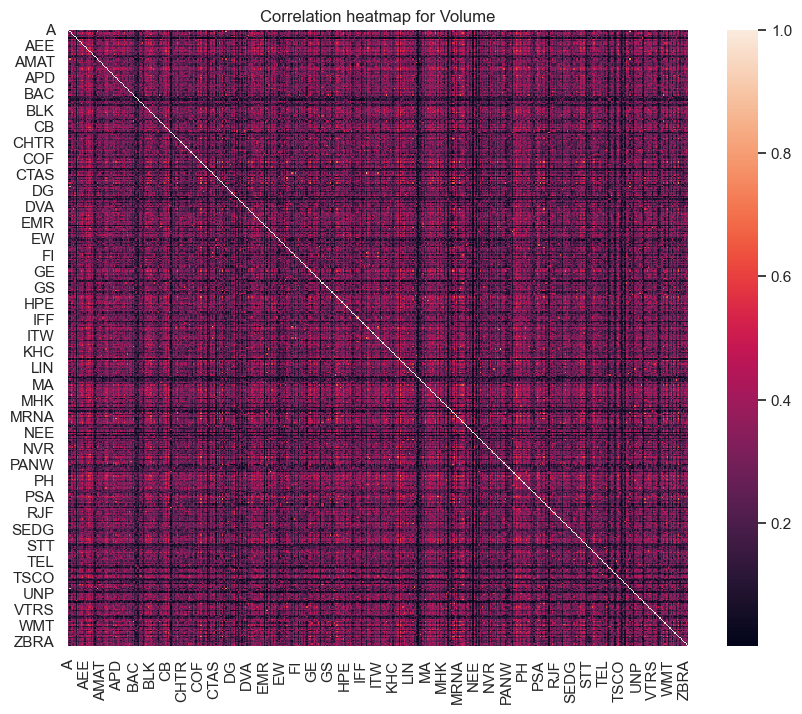

In [28]:
sns.heatmap(abs(volume_corr)).set_title("Correlation heatmap for Volume")

Text(0.5, 1.0, 'Correlation heatmap for Price Changes')

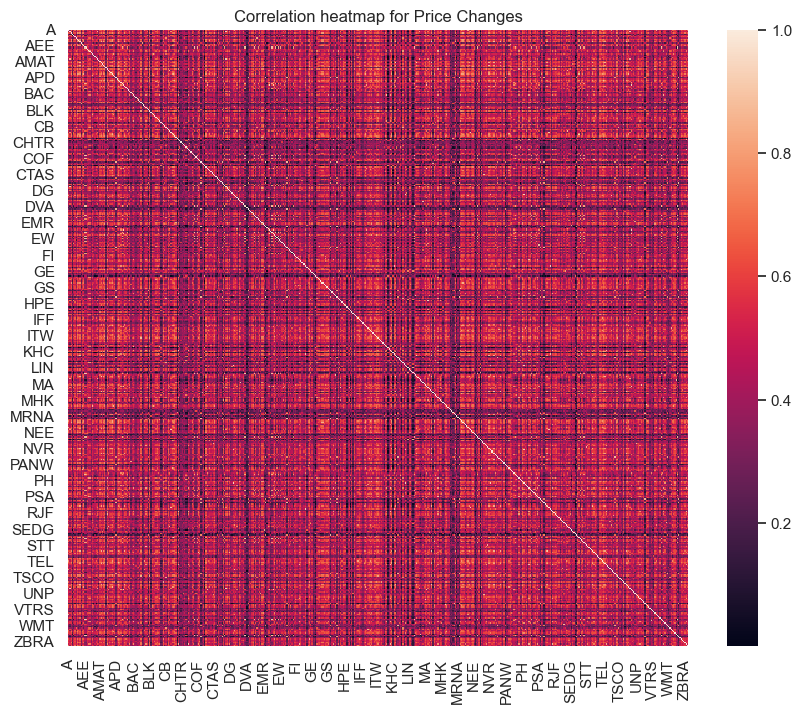

In [29]:
sns.heatmap(abs(price_corr)).set_title("Correlation heatmap for Price Changes")

### Examining correlations further

In [30]:
df_price_pct['JPM'].head()

2022-01-04    0.037910
2022-01-05   -0.018282
2022-01-06    0.010624
2022-01-07    0.009908
2022-01-10    0.000957
Name: JPM, dtype: float64

Text(0.5, 1.0, 'Price Change Scatterplot between JPM and GS. Correlation = 0.8280991511368698')

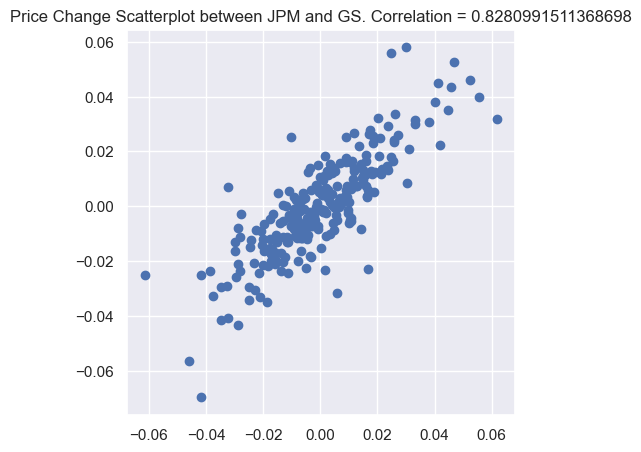

In [31]:
plt.figure(figsize=(5,5))
plt.scatter(df_price_pct['JPM'], df_price_pct['GS'])
plt.title('Price Change Scatterplot between JPM and GS. Correlation = {}'.format(abs(price_corr['JPM']['GS'])))

Summary statistics for the df_price_pct and df_volume dataframes and then boxplots to find outliers

In [32]:
df_price_pct.head()

A       AAL      AAPL      ABBV      ABNB       ABT  \
2022-01-04 -0.033806  0.014400 -0.012692 -0.001920 -0.010887 -0.023518   
2022-01-05 -0.017131 -0.017876 -0.026600  0.005253 -0.050059 -0.004493   
2022-01-06  0.003499 -0.005889 -0.016693 -0.004710 -0.015408 -0.000148   
2022-01-07 -0.026623  0.038234  0.000988 -0.002588  0.039437  0.003108   
2022-01-10  0.000069 -0.025415  0.000116  0.011195 -0.032159 -0.002213   

                ACGL       ACN      ADBE       ADI  ...      WYNN       XEL  \
2022-01-04  0.013019 -0.007146 -0.018374 -0.009032  ... -0.003190  0.006329   
2022-01-05 -0.011744 -0.017611 -0.071426 -0.015437  ... -0.037033  0.009800   
2022-01-06  0.005830 -0.048290 -0.000603  0.003182  ...  0.004629 -0.007822   
2022-01-07  0.004681 -0.019180 -0.006652 -0.026241  ... -0.001063  0.008759   
2022-01-10  0.021078  0.006069  0.029626  0.009239  ... -0.028149  0.010999   

                 XOM      XRAY       XYL       YUM       ZBH      ZBRA  \
2022-01-04  0.037614  0.005098  0.010608  0.005347  0.010145  0.006337   
2022-01-05  0.012437 -0.016089 -0.013629 -0.012676 -0.003296 -0.050068   
2022-01-06  0.023521 -0.000711 -0.001373  0.010331 -0.008307 -0.005410   
2022-01-07  0.008197  0.003202 -0.007992 -0.011467 -0.006050 -0.043771   
2022-01-10 -0.005952 -0.016844 -0.010136 -0.013964 -0.009754  0.008571   

                ZION       ZTS  
2022-01-04  0.028487 -0.038072  
2022-01-05  0.002270 -0.038024  
2022-01-06  0.041075  0.003971  
2022-01-07  0.016681 -0.029114  
2022-01-10 -0.007562  0.007153  

[5 rows x 497 columns]

# Summary Stats and Outliers?
The below box plot is showing the price percentage change averaged across all 500 companies for each day, there's very few outliers so it doesn't seem like theres one day in the timeseries (1 year) where all the companies are all having drastic movement.




C:\Users\sofia\AppData\Local\Temp\ipykernel_15528\277751740.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_price_plotting['average'] = df_price_plotting.mean(axis=1)


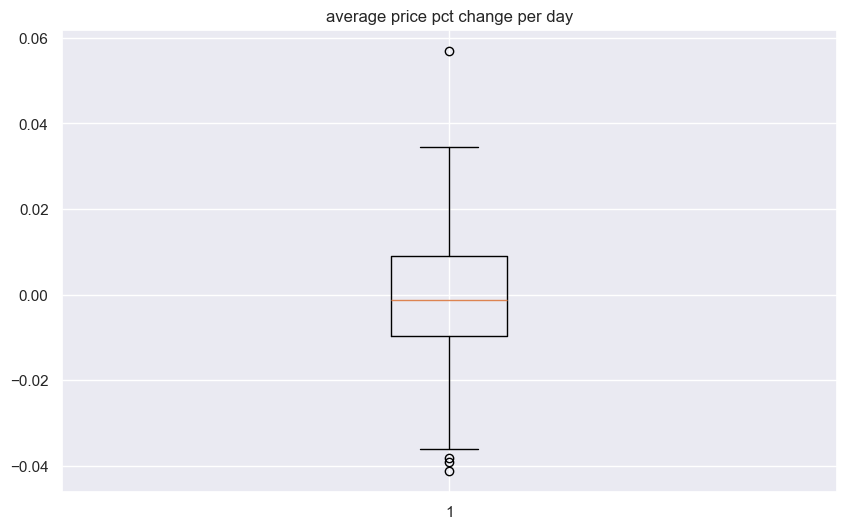

count    250.000000
mean      -0.000281
std        0.014769
min       -0.041227
25%       -0.009718
50%       -0.001182
75%        0.009024
max        0.057001
Name: average, dtype: float64

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
df_price_plotting = df_price_pct
df_price_plotting['average'] = df_price_plotting.mean(axis=1)
#average across all companies per day



# Creating plot
plt.boxplot(df_price_plotting['average'])

# show plot
plt.title('average price pct change per day')
plt.show()
df_price_plotting['average'].describe()

the above box plot shows that there was one day where everyone on the index did really well with an average price change of .057
so this day is an outlier and maybe? should be removed idk

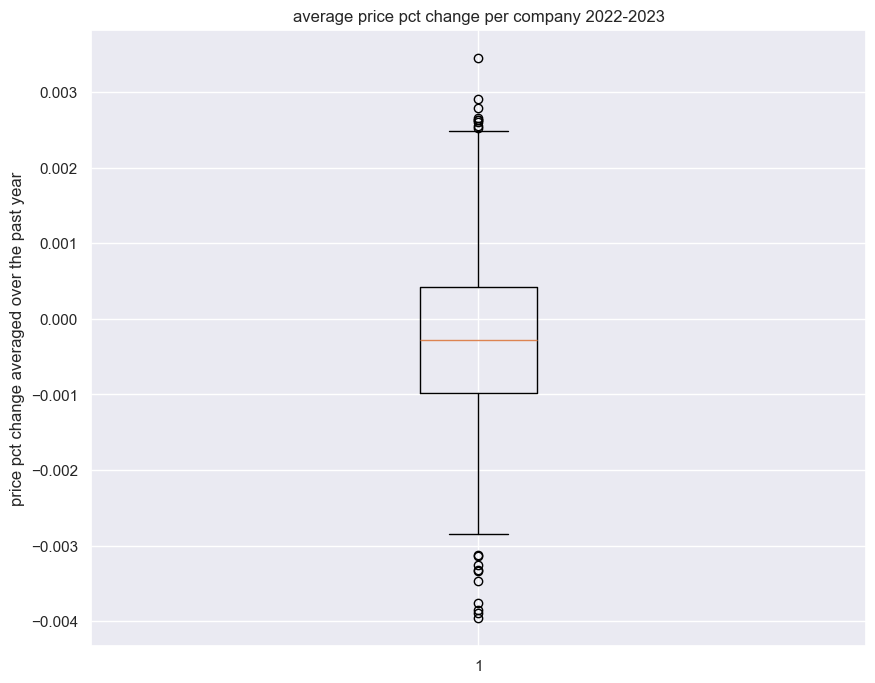

In [34]:
df_2 = df_price_plotting.mean(axis=0)
avg_per_company = list(df_2.values)
plt.boxplot(avg_per_company)
plt.title('average price pct change per company 2022-2023')
plt.ylabel('price pct change averaged over the past year')
plt.show()


the above boxplot shows that there was a lot of outlier companies but one in particular with an average price percentage change of .003 which is very high. so lets try to get rid of it.....

In [35]:
max_avg_price_pct = max(avg_per_company)
outlier = df_2[df_2 == max_avg_price_pct]
print(outlier)

OXY    0.003455
dtype: float64


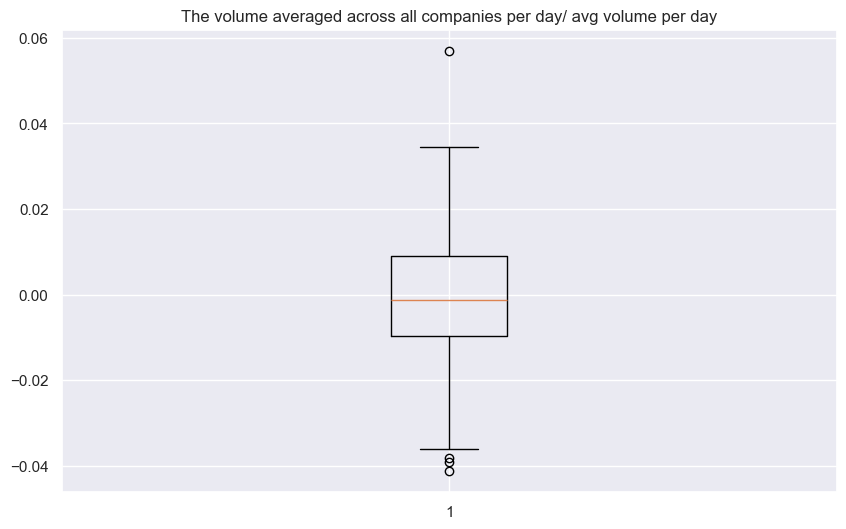

count    250.000000
mean      -0.000281
std        0.014769
min       -0.041227
25%       -0.009718
50%       -0.001182
75%        0.009024
max        0.057001
Name: average, dtype: float64

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set(title="The volume averaged across all companies per day/ avg volume per day")
df_volume_summary_stats = df_volume.describe()
df_volume_summary_stats['average'] = df_volume_summary_stats.mean(axis=1)
df_volume_summary_stats['average']


# Creating plot
plt.boxplot(df_price_plotting['average'])

# show plot
plt.show()
df_price_plotting['average'].describe()

### Analyzng the distributions over time

This time instead of averaging every companies price change per day we're going to look at every company's price change over one day and make a separate boxplot to show the changes in distribution across the week of the crash

on Jan 4th there was  3  negative outliers and  5 positive outliers in the distribution
on April 1st there was  15  negative outliers and  3 positive outliers in the distribution
on July 1st there was  25  negative outliers and  10 positive outliers in the distribution
on November 1st there was  18  negative outliers and  18 positive outliers in the distribution




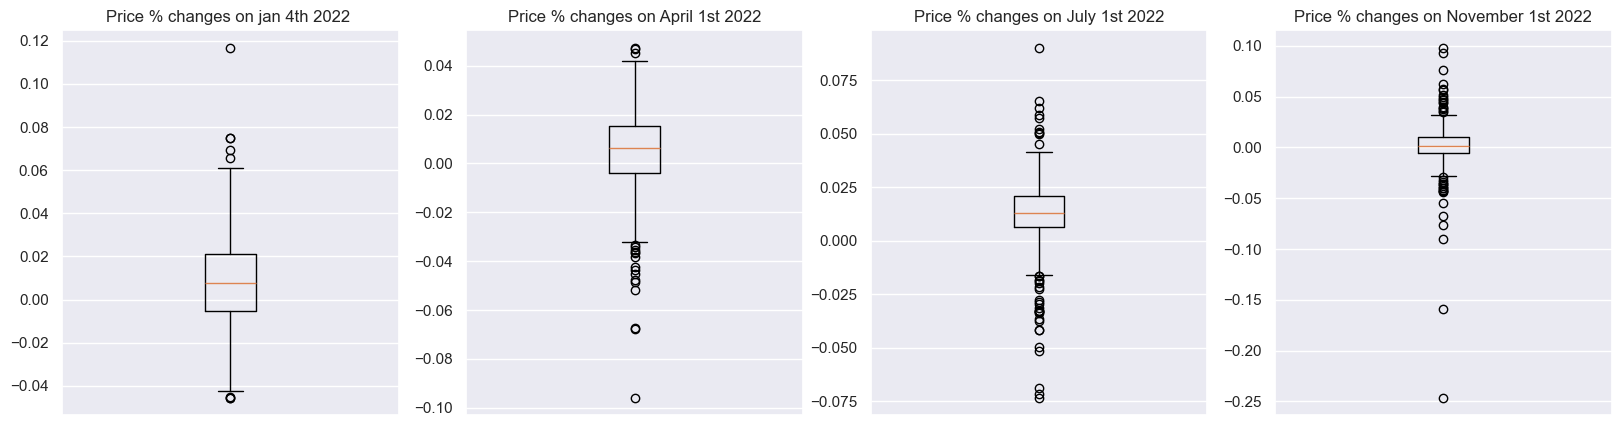

In [37]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(20, 5), ncols=4)
bxplt1 = ax1.boxplot(df_price_pct.loc['2022-01-04'])
bxplt2 = ax2.boxplot(df_price_pct.loc['2022-04-01'])
bxplt3 = ax3.boxplot(df_price_pct.loc['2022-07-01'])
bxplt4 = ax4.boxplot(df_price_pct.loc['2022-11-01'])
ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax3.xaxis.set_visible(False)
ax4.xaxis.set_visible(False)

outliers1 = bxplt1["fliers"][0].get_ydata()
outliers2 = bxplt2["fliers"][0].get_ydata()
outliers3 = bxplt3['fliers'][0].get_ydata()
outliers4 = bxplt4['fliers'][0].get_ydata()

neg_outliers1 = outliers1[outliers1<0]
neg_outliers2 = outliers2[outliers2<0]


print('on Jan 4th there was ', len(neg_outliers1), ' negative outliers and ', len(outliers1[outliers1>0]), 'positive outliers in the distribution')
print('on April 1st there was ', len(neg_outliers2), ' negative outliers and ', len(outliers2[outliers2>0]), 'positive outliers in the distribution')
print('on July 1st there was ', len(outliers3[outliers3<0]), ' negative outliers and ', len(outliers3[outliers3>0]), 'positive outliers in the distribution')
print('on November 1st there was ', len(outliers4[outliers4<0]), ' negative outliers and ', len(outliers4[outliers4<0]), 'positive outliers in the distribution\n\n')

ax1.set(title="Price % changes on jan 4th 2022 ")
ax2.set(title="Price % changes on April 1st 2022")
ax3.set(title= "Price % changes on July 1st 2022")
ax4.set(title = "Price % changes on November 1st 2022")
plt.show()

This is also shown in the line graph showing how during the week of the crash, healthcare company ABT stayed consistent with the monthly trends while financial company charles schwab had one of its lowest price drops. Tesla, a silicon tech company had big drop on the 9th but rebounded pretty quickly

I wanted to show how the crash affects other sectors besides financial

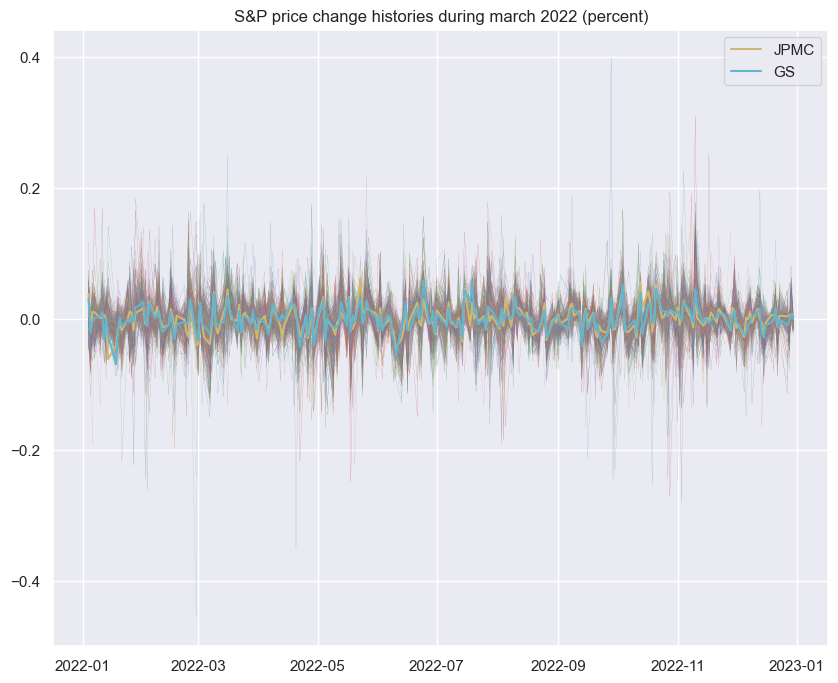

In [38]:
plt.title('S&P price change histories during march 2022 (percent)')
plt.plot(df_price_pct, linewidth=0.10)
plt.plot(df_price_pct['JPM'], label='JPMC', linewidth=1.5)
plt.plot(df_price_pct['GS'], label='GS', linewidth=1.5)
#plt.plot(df_price_pct['SCHW'], label = 'Charles Schwab Bank', linewidth=1.5)
#plt.plot(df_price_pct['TSLA'], label = 'Tesla', linewidth=1.5)
plt.legend()
plt.show()

## <font color= "9900CC">**Not every company reacted the same way**
In the original time series used for the file, JPMC and GS's price changes were consistent with each other throughout the month. However, when we set the timeseries to march 2023, during the week of the SVB crash they diverge drastically, this is because while GS suffered due to uncertaintiy w/ the economy, JPMC was in talks to accquire SVB thus their price sky rocketed so you can't definetively say every financial company suffered due to the crash.

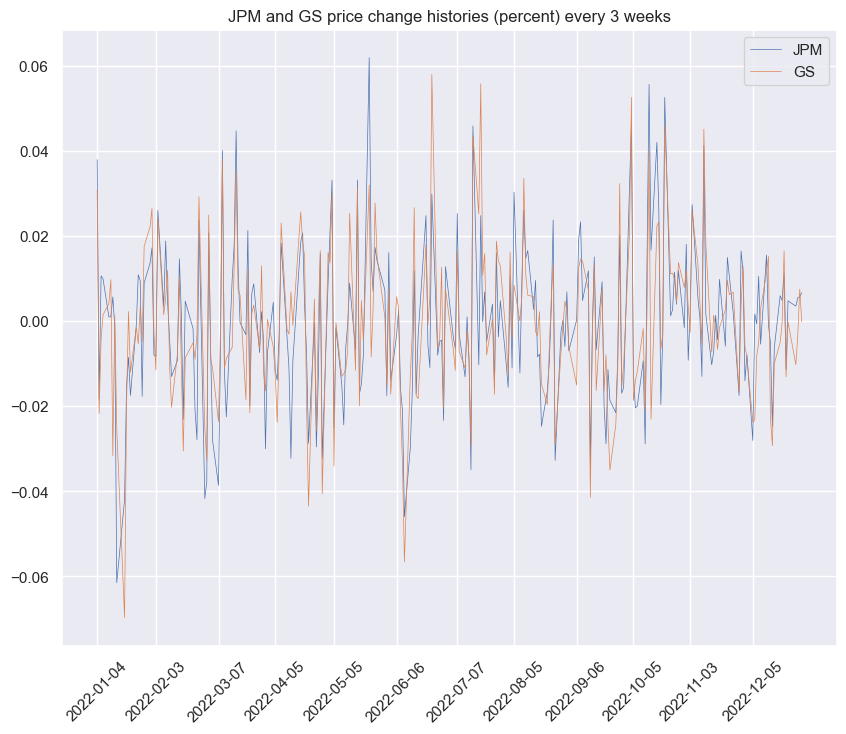

In [39]:
plt.title('JPM and GS price change histories (percent) every 3 weeks')
plt.plot(df_price_pct['JPM'], label='JPM', linewidth=0.5)
plt.plot(df_price_pct['GS'], label='GS', linewidth=0.5)
dates = list(df_price_pct.index.values)
plt.xticks([dates[i] for i in range(len(dates)) if i % 21 == 0], rotation=45)
plt.legend()
plt.show()

In [40]:
df_price_pct_summary_stats = df_price_pct.describe()
df_price_pct_summary_stats['average'] = df_price_pct_summary_stats.mean(axis=1)
print('summary statistics for price (not pct change) averaged across all companies')
#df_price_pct_summary_stats.head()
print(df_price_pct_summary_stats['average'])

summary statistics for price (not pct change) averaged across all companies
count    250.000000
mean      -0.000281
std        0.022589
min       -0.088391
25%       -0.013706
50%       -0.000429
75%        0.013224
max        0.084975
Name: average, dtype: float64


## Saving correlation dataframes

In [41]:
#df_price_pct.to_csv(os.path.join(data_dir, 'price_pct.csv'), index_label='date')
price_corr.to_csv(os.path.join(data_dir, 'price_corr.csv'), index_label='Symbol')
volume_corr.to_csv(os.path.join(data_dir, 'volume_corr.csv'))

## heatmap threshold .95

Text(0.5, 1.0, 'Price Correlation Heatmap')

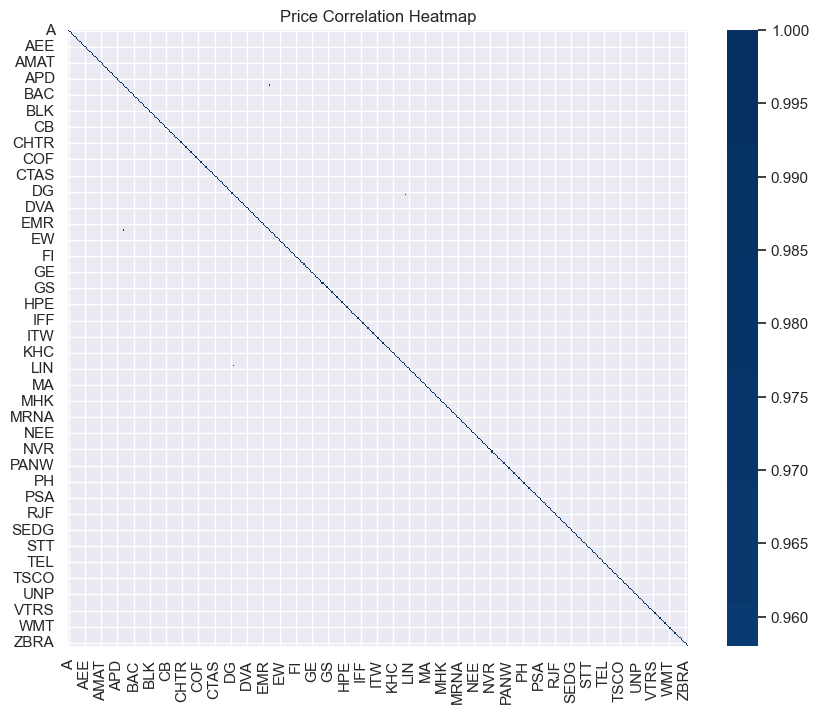

In [42]:
# price_corr = pd.read_csv('price_corr.csv', index_col=0)

# threshold = 0.7
threshold = 0.95

# Create a mask to hide the upper triangle of the heatmap
mask = price_corr.abs() < threshold

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(price_corr, cmap='RdBu', mask=mask, center=0)
plt.title('Price Correlation Heatmap')


## Use the price corr matrix to graph the correlation

In [43]:
! pip install networkx


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import networkx as nx
import plotly.graph_objects as go

In [45]:
'''
# need to look into graph the non-diagonal points
Gra = nx.Graph()

# Add nodes to the graph
for i in range(len(price_corr)):
    G.add_node(i)

# Add edges(the corr of two companies) to the graph
for i in range(len(price_corr)):
    for j in range(i + 1, len(price_corr)):
        if price_corr[i, j] > 0.5:
            Gra.add_edge(i, j, weight=price_corr[i, j])


print(Gra)'''

'\n# need to look into graph the non-diagonal points\nGra = nx.Graph()\n\n# Add nodes to the graph\nfor i in range(len(price_corr)):\n    G.add_node(i)\n\n# Add edges(the corr of two companies) to the graph\nfor i in range(len(price_corr)):\n    for j in range(i + 1, len(price_corr)):\n        if price_corr[i, j] > 0.5:\n            Gra.add_edge(i, j, weight=price_corr[i, j])\n\n\nprint(Gra)'

So if you want to look at overall price percentage history across a year timeseries then the threshold needs to be much lower


In [46]:
threshold = .85

links = abs(price_corr).stack().reset_index()
links.columns = ['company1', 'company2', 'correlation']
#made price_corr go from company names as the row and column indeces to company1 being the first column header, company2 beign the second, and correlation as the third

#filtering out any correlations under the threshold that we will set and getting rid of the self loops in the nodes
links_filtered=links.loc[ (links['correlation'] > threshold) & (links['company1'] != links['company2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'company1', 'company2', edge_attr = 'correlation')
nodes = list(G.nodes)

#df_company_names = pd.DataFrame(nodes, columns=['S&P Names'])
nx.set_node_attributes(G, symbols_industries_dict, 'GICS Sector')



## Adding weights to the edges

I'm going to make the edge color on the graph be a darker blue if the correlation is higher between the nodes

in the code above i set an edge attribute as 'correlation' now im iterating through the links_filtered to get two lists: edges (s,d) and weight (correlation)

in the code block below i set the edgelist to that edges list i just made and set the edge_color to the weights themselves, the colors and numbers map based on the edge c_map (color_map) called plt.cm.Blues

In [47]:
edges = []
weights = []

# Iterate through the edges of the graph and extract 'correlation' as weights
#were making an edges list and a weights list
for edge in G.edges(data=True):
    source, target, weight = edge
    edges.append((source, target))
    weights.append(weight['correlation'])



Making a custom node color map based on sector
this will be used for the networkx (static) and plotly graphs (interactive)

In [48]:
# Making a custom node color map based on sector


val_map = {
    'Materials': 'navy',
    'Consumer Staples': 'purple',
    'Energy': 'teal',
    'Real Estate': 'cyan',
    'Information Technology': 'dodgerblue',
    'Utilities': 'blue',
    'Health Care': 'indigo',
    'Industrials': 'royalblue',
    'Consumer Discretionary': 'skyblue',
    'Communication Services': 'midnightblue',
    'Financials': 'steelblue'
}

#list comprehension so cool
#for every node's sector theres a corresponding color
node_colors = [val_map.get(G.nodes[node]['GICS Sector']) for node in G.nodes()]

G is the graph but now I'm playing with different ways to visualize it, the original briefing video mentioned making an interactive graph so i'm going to try that. below is the standard static graph that doesn't tell us much.  you can still tell which nodes are central and which are outliers relative to each other though.

Drawing the network with the custom node color map and edge colormap

it should be noted that i cant make a colormap for the node colors (i could for edges tho) the node colors have literally nothing to do with each other just if its the same color its the same industry

for the edge colors, if the edge is lighter, then the correlation is weaker

C:\Users\sofia\AppData\Local\Temp\ipykernel_15528\1366946170.py:11: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G,pos,


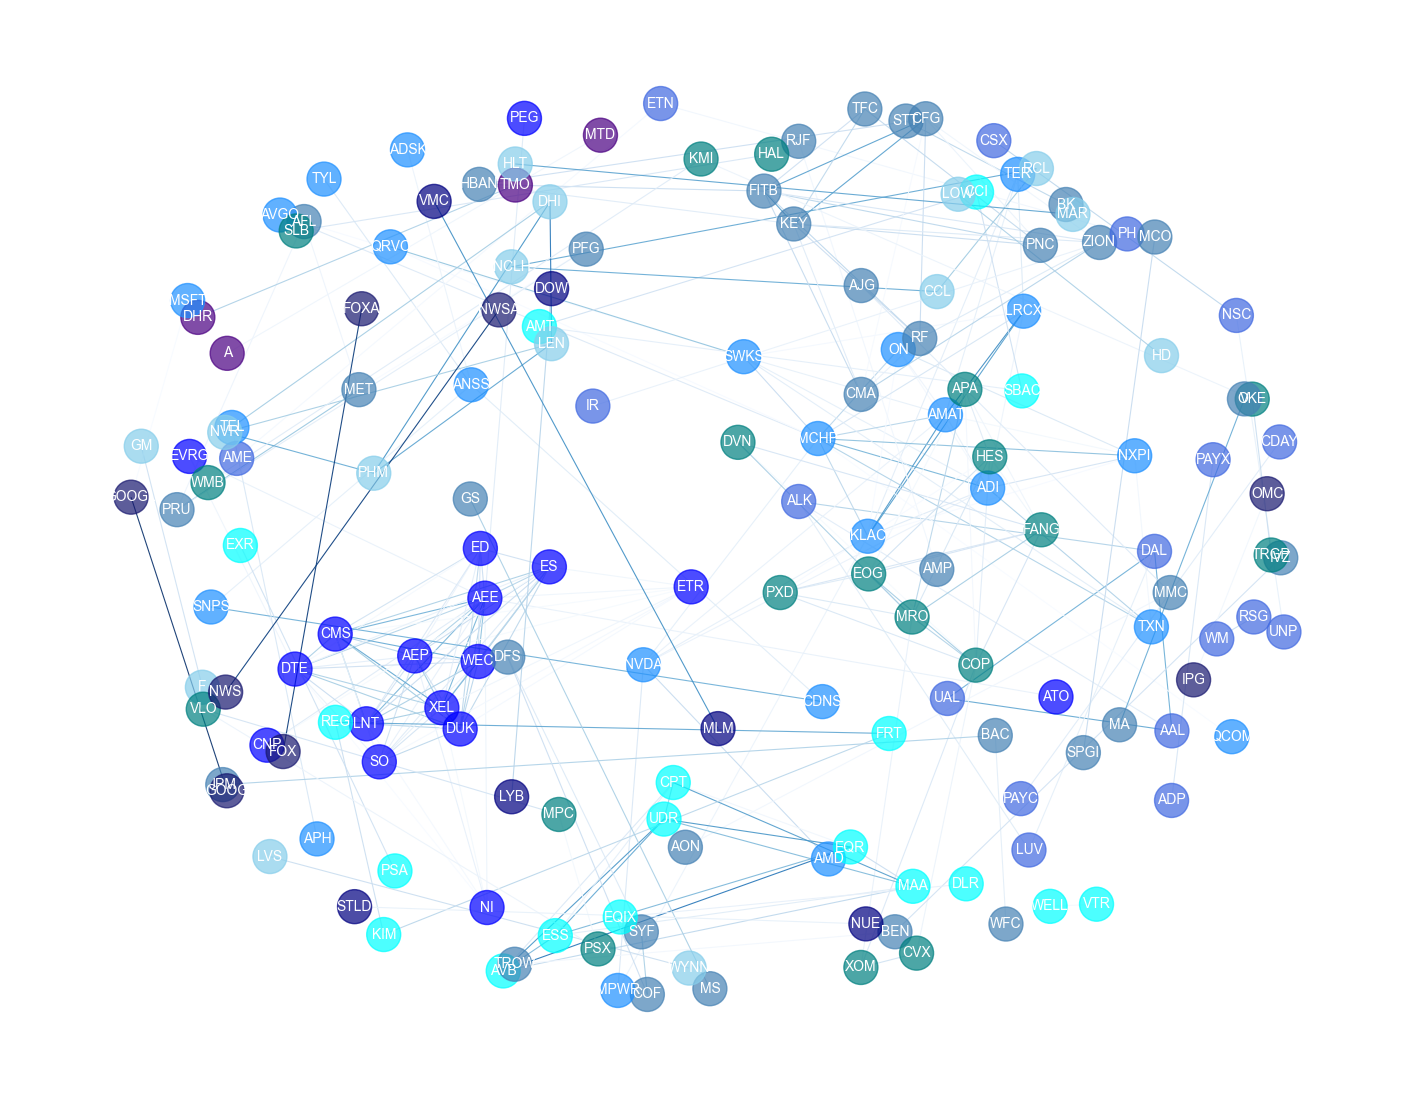

In [49]:
from matplotlib import cm
plt.figure(figsize=(18, 14))


pos = nx.spring_layout(G, k=.7, seed =1234)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodes,
                       node_size=600,
                       node_color=node_colors,
                       alpha=.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = edges,
                       width=.8,
                       edge_color= weights,
                       edge_cmap = plt.cm.Blues,
                       alpha=0.9)


nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodes,nodes)),
                        font_color='white',
                        font_size = 10)

cmap = cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=threshold, vmax=1))


plt.box(False)
plt.show()


## Make it interactive

In [50]:
#pos = nx.spring_layout(G, seed=1234) #seed for reproducibility
nx.set_node_attributes(G, pos, 'pos')

In [51]:
# hover text
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(nodes[node]+' # of connections: '+str(len(adjacencies[1])))

## Edge Trace
So for plotly you cant just import a premade graph you have to trace over every node and edge and put into the plotly scatter plot

uses the spring layout positions to get the coordinates of the first node and second node in the edge to make the edge_x[] and edge_y[]

edge trace takes those arrays and traces them with a thin grey line

In [52]:
###Custom Color Map for the edges you cant use a colorscale i think i need to do this manually

import matplotlib.cm as cm
normalized_weights = (np.array(weights) - min(weights)) / (max(weights) - min(weights))
num_intervals = 10
colors = np.linspace(0, 1, num_intervals) #start stop intervals basically its grey scale not really color map lol

In [53]:
edge_traces = []

for i, edge in enumerate(G.edges()):
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    # set the color for the current edge based on the normalized weight
    #going to do rgb for the colors
    color_index = int(normalized_weights[i] * (num_intervals - 1))
    color_rgb = f"rgb({int(colors[color_index] * 255)}, {int(colors[color_index] * 255)}, {int(colors[color_index] * 255)}  )" #so because the three rgb values are equal its just going to be in greyscale lol
    edge_trace = go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        #hoverinfo='text',
        mode='lines',
        hoverinfo = 'text',
        line=dict(
            width=1.5,
            color=color_rgb,
        )
    )

    edge_traces.append(edge_trace)


## Node Trace
this is setting up the hovertext and the normal text (labels) for the nodes
you set the mode to markers+text to show the labels and the circles, if you do markers+text+lines it'll show additional lines (edges) between nodes that dont make sense in the marker attribute were setting up for the node's color to be depedent on the num of adjacancies

Then custom node color map these colors have nothing to do with each other !!!!!

In [54]:
node_colors = [val_map.get(G.nodes[node]['GICS Sector']) for node in G.nodes()]

# Node Positions
node_x = []
node_y = []

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

# Node Trace
node_trace = go.Scatter(
    x=node_x, y=node_y,
    hoverinfo='text',
    text=list(G.nodes()),
    hovertext=node_text,
    textposition='top right',
    mode='markers+text',
    marker=dict(
        color=node_colors,
        size=10,
        line_width=1
    ))


In [55]:
! pip install --upgrade nbformat


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
fig = go.Figure(data=edge_traces + [node_trace],
             layout=go.Layout(
                title='<br>Correlation of S&P Companies based on Price Change',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

# Show the Figure
fig.show()

<b>Where to go from here</b><br></br>
your going to generate the clusters using heirarhcical clustering (CAs told us to) and generate a similar plotly graph, ideally it should be big circles  that u can make more transparent, then your going to overlay that on top of the prexisting graph to show the nodes and then on top which overall cluster its apart of.

take into account industry and price corr for ur clusters (wait for later to factor in other things)

<h1>Clustering</h1>
doing heirarchical clustering on the correlation matrix

i need to convert it to a distance matrix
agglomerative clustering
and cut the dendogram to get the clusters?

In [57]:
! pip install sklearn


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
! pip install scipy


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score

In [60]:
'''
distance_matrix = pdist(price_corr, metric='euclidean')
full_price_distance= squareform(distance_matrix)
 #using euclidean distance i believe our last TA told us to use this
print(full_price_distance)'''

#online it says that heirarchical clustering is not used to correlation, only distance which is why i did the above comment

#we do absolute value of the correlations because if two companies have a correlation of .9 they're stronngly direct correlated
#if they have a correlation of -.9 they're still strongly correlated just inversely, that's still a relationship


#we are doing a dissimilarity matrix so companies that are closer together have a lower number, 
# this means that they will have a lower distance


#okay so dissimilarity matrix (Z) is an array of arrays, the inner arrays represent each company and that company's relationship to the other 500
#squareform(dissimilarity) gets rid of the 0s of the relationship w a company to itself it also makes it all into a 1d array


#Each row in the linkage matrix describes a merge of two clusters, identified by their indices, 
        # along with information about the distance or similarity at which the merge occurs 4th value is always how many clusters were merged together (2).
#diff types of linkage determine how the clusters are merged 
# single - merge clusters closest together , 
# complete - merge clusters furthest
#ward linkage attempts to minimize variance within clusters after being merged
#single linkage maximized the cophenetic correlation the others were around .34 and .38
dissimilarity = 1- abs(df_price_pct.corr().values)


# Calculate cluster labels using hierarchical clustering (you've already done this)
thresholds = [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65]
#silhouette_scores = []
linkage_methods = ['complete','ward','median','average','centroid','weighted']
#cophenet_correlations = []

#im going to store the results of this for loop into a dataframe so i can compare everything better
columns = ['threshold','Silhouette','linkage', 'cophenet corr']
price_corr_eval = pd.DataFrame(columns=columns)

for t in thresholds:
        
        for l in linkage_methods:
                Z = linkage(squareform(dissimilarity), l)
                labels = fcluster(Z, t, criterion='distance')
                silhouette_avg = silhouette_score(dissimilarity, labels, metric='precomputed')
                #silhouette_scores.append(silhouette_avg)

                c, _ = cophenet(Z, squareform(dissimilarity))
                #cophenet_correlations.append(c)
                
                new_row = [t, silhouette_avg, l, c]
                price_corr_eval.loc[len(price_corr_eval)] = new_row
                

price_corr_eval.loc[:10]

threshold  Silhouette   linkage  cophenet corr
0        0.05    0.014328  complete       0.496474
1        0.05    0.014328      ward       0.608534
2        0.05    0.014328    median       0.680904
3        0.05    0.014328   average       0.770839
4        0.05    0.014328  centroid       0.755237
5        0.05    0.014328  weighted       0.704925
6        0.10    0.054471  complete       0.496474
7        0.10    0.050974      ward       0.608534
8        0.10    0.054251    median       0.680904
9        0.10    0.054471   average       0.770839
10       0.10    0.055454  centroid       0.755237

In [61]:

df_price_pct.corr().head()

A       AAL      AAPL      ABBV      ABNB       ABT      ACGL  \
A     1.000000  0.407709  0.655079  0.326510  0.508649  0.694501  0.387889   
AAL   0.407709  1.000000  0.578066  0.150788  0.656190  0.457502  0.443662   
AAPL  0.655079  0.578066  1.000000  0.237848  0.614346  0.626045  0.409057   
ABBV  0.326510  0.150788  0.237848  1.000000  0.064071  0.459730  0.231744   
ABNB  0.508649  0.656190  0.614346  0.064071  1.000000  0.453697  0.279895   

           ACN      ADBE       ADI  ...       XEL       XOM      XRAY  \
A     0.716137  0.646866  0.659651  ...  0.377577  0.244668  0.467659   
AAL   0.543218  0.471284  0.601553  ...  0.211978  0.117557  0.335173   
AAPL  0.793634  0.712878  0.757031  ...  0.435888  0.272653  0.446409   
ABBV  0.339735  0.183756  0.293731  ...  0.374312  0.180722  0.305446   
ABNB  0.609634  0.553967  0.624117  ...  0.114635  0.262851  0.432287   

           XYL       YUM       ZBH      ZBRA      ZION       ZTS   average  
A     0.644946  0.571664  0.549948  0.608283  0.486459  0.717034  0.764933  
AAL   0.518664  0.536259  0.494229  0.513814  0.554393  0.392053  0.691052  
AAPL  0.622754  0.577940  0.563028  0.714866  0.562129  0.669386  0.818094  
ABBV  0.274009  0.250047  0.322013  0.177528  0.264412  0.400356  0.386019  
ABNB  0.512740  0.547555  0.495449  0.566134  0.504051  0.490282  0.694089  

[5 rows x 498 columns]

In [62]:
dissimilarity[:5, :10]

array([[0.        , 0.5922909 , 0.34492053, 0.67348973, 0.4913507 ,
        0.30549927, 0.61211069, 0.28386315, 0.35313369, 0.34034945],
       [0.5922909 , 0.        , 0.42193379, 0.84921152, 0.34380964,
        0.54249755, 0.55633845, 0.45678156, 0.52871598, 0.39844678],
       [0.34492053, 0.42193379, 0.        , 0.76215201, 0.38565387,
        0.37395485, 0.59094289, 0.20636582, 0.28712153, 0.24296924],
       [0.67348973, 0.84921152, 0.76215201, 0.        , 0.9359293 ,
        0.54026971, 0.76825643, 0.66026518, 0.8162437 , 0.70626907],
       [0.4913507 , 0.34380964, 0.38565387, 0.9359293 , 0.        ,
        0.54630257, 0.72010507, 0.39036567, 0.44603327, 0.37588259]])

<h1>cophenet corr dependent on the linakge method
silhouette score dependent on the threshold</h1>

Text(0.5, 1.0, 'threshold vs silhouette score for ward linkage')

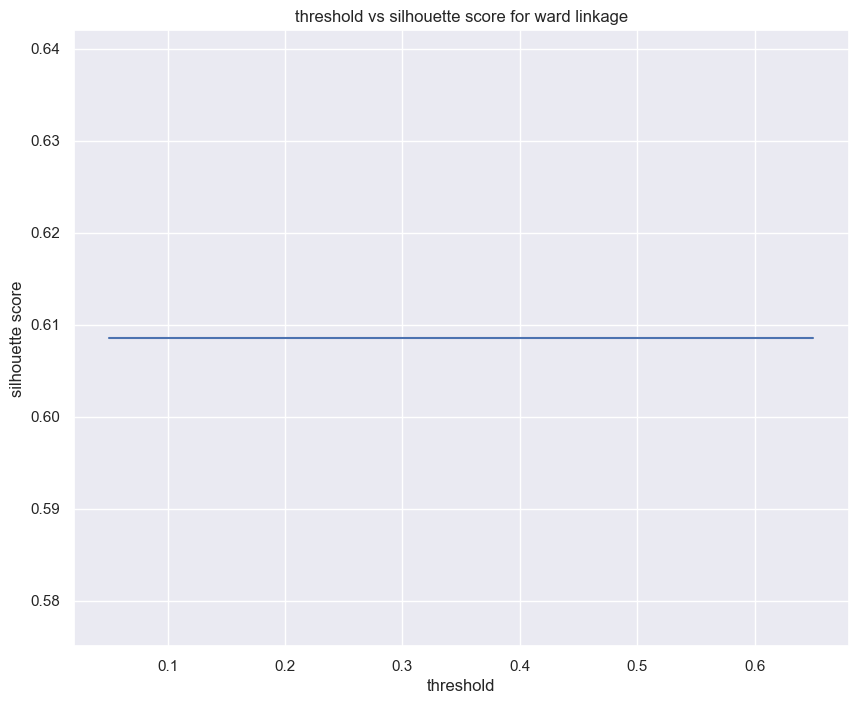

In [63]:
rslt_df = price_corr_eval[price_corr_eval['linkage'] == 'ward'] 
plt.plot(rslt_df['threshold'], rslt_df['cophenet corr'])

# Add labels and title
plt.xlabel('threshold')
plt.ylabel('silhouette score')
plt.title('threshold vs silhouette score for ward linkage')

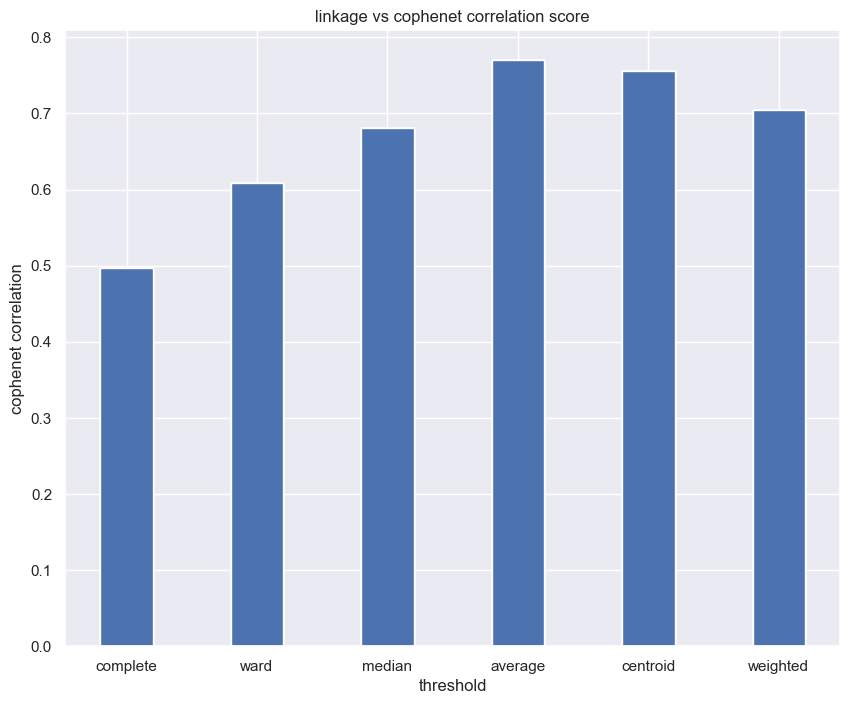

In [64]:

plt.bar(price_corr_eval['linkage'], price_corr_eval['cophenet corr'], width = 0.4)
# Add labels and title
plt.xlabel('threshold')
plt.ylabel('cophenet correlation')
plt.title('linkage vs cophenet correlation score' )
plt.show()

finding best cophenetic corr and silhouette score

In [65]:

def custom_score(row):
    return row['Silhouette'] + row['cophenet corr']

# Apply the custom score function to each row in the DataFrame
price_corr_eval['Custom_Score'] = price_corr_eval.apply(custom_score, axis=1)

# Find the entry with the highest custom score
max_entry = price_corr_eval[price_corr_eval['Custom_Score'] == price_corr_eval['Custom_Score'].max()]

# Print the entry with the highest custom score
max_entry


threshold  Silhouette   linkage  cophenet corr  Custom_Score
76       0.65    0.242824  centroid       0.755237      0.998061

So i thought maximizing the cophenet corr and silhouette score would mean u have the optimal amount of clusters,,, however this gave us 3 clusters one with 496 samples, 1 with 1 sample and a3rd with 1 sample which is pretty useless imo.

so maybe we take like the median?

<h1>What does the dendrogram look like with best silhouette and cophenet corr</h1>

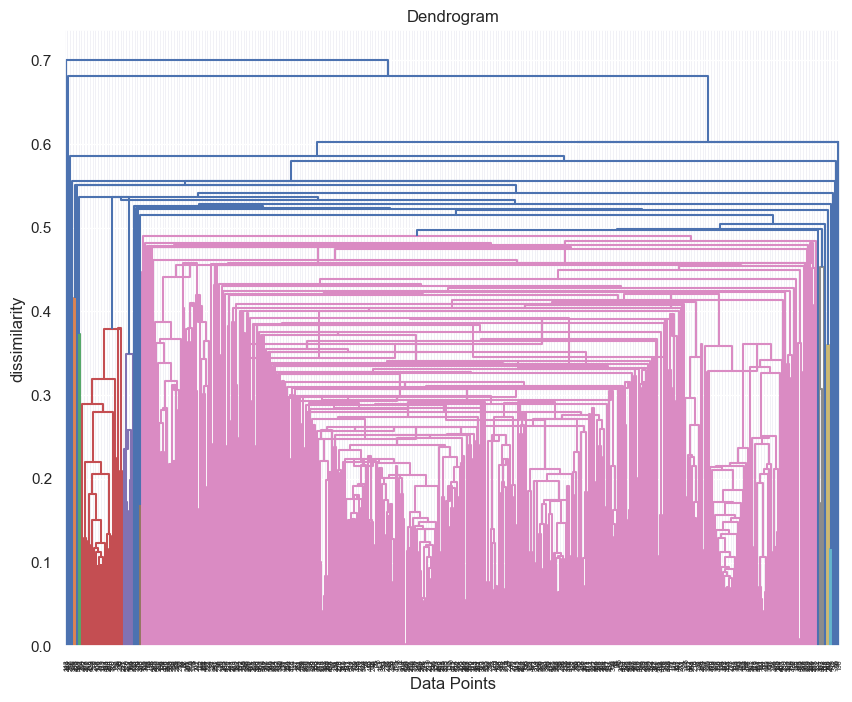

there are three clustres and these are the sizes of each [496, 1, 1]


In [66]:
Z = linkage(squareform(dissimilarity), method="centroid", optimal_ordering=True)

dendrogram = sch.dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('dissimilarity')
plt.title('Dendrogram')
plt.show()

labels = fcluster(Z, .65, criterion='distance')
silhouette_avg = silhouette_score(dissimilarity, labels, metric='precomputed')
num_clusters = len(set(labels))


unique_labels = np.unique(labels)
cluster_sizes = [np.sum(labels == label) for label in unique_labels]

# Calculate the ratio of cluster sizes
size_ratio = max(cluster_sizes) / min(cluster_sizes)
print('there are three clustres and these are the sizes of each', cluster_sizes)


<h1>Wow thats very unbalanced lets try the median of cophenet corr and silhouette </h1>

In [67]:
#price_corr_eval.drop(columns = 'Custom_Score', inplace = True)
median_silhouette = price_corr_eval['Silhouette'].median()
median_cophenet = price_corr_eval['cophenet corr'].median()
#so i got the median values of silhouette score and cophenet correlation 

#then i found the difference between each rows vals and the median for both silhouette and cophenet abs()
price_corr_eval['Silhouette_diff'] = abs(price_corr_eval['Silhouette'] - median_silhouette)
price_corr_eval['Cophenet_diff'] = abs(price_corr_eval['cophenet corr'] - median_cophenet)
#made silhouette diff and cophenet diff into new columns in the dataframe


# calculate the total difference for both silhouette and cophenet
price_corr_eval['Total_diff'] = price_corr_eval['Silhouette_diff'] + price_corr_eval['Cophenet_diff']

# Find the row with the median values (minimum total absolute difference) or closest possible to the meidan vals
median_entry = price_corr_eval[price_corr_eval['Total_diff'] == price_corr_eval['Total_diff'].min()]


median_entry

threshold  Silhouette   linkage  cophenet corr  Custom_Score  \
71       0.60    0.135092  weighted       0.704925      0.840016   
74       0.65    0.132195    median       0.680904      0.813099   

    Silhouette_diff  Cophenet_diff  Total_diff  
71         0.001448        0.01201    0.013459  
74         0.001448        0.01201    0.013459

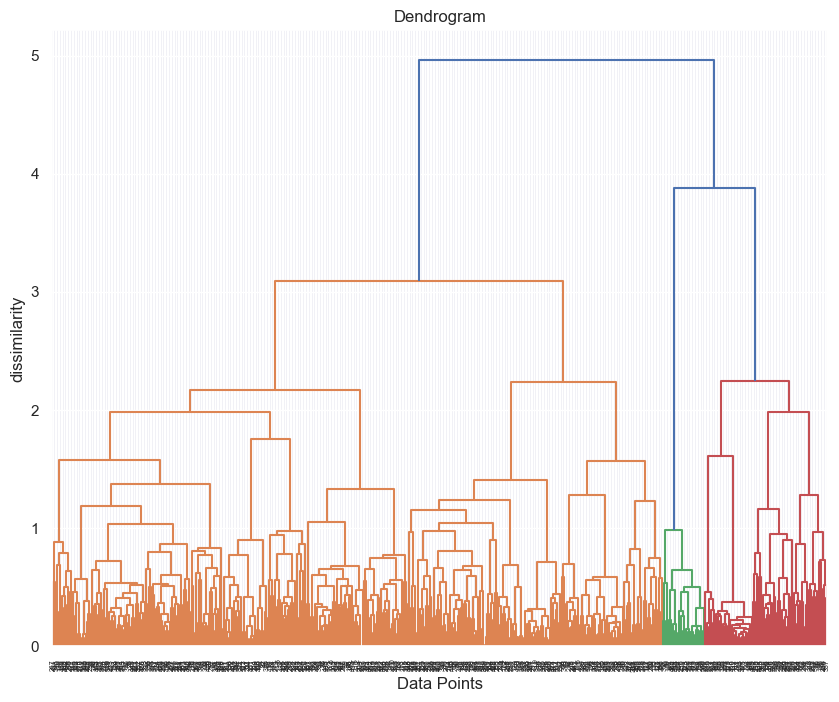

there are  3  clustres and these are the sizes of each [392, 27, 79]
silhouette score is:  0.24054755227725944


In [68]:
Z = linkage(squareform(dissimilarity), method="ward", optimal_ordering=True)

dendrogram = sch.dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('dissimilarity')
plt.title('Dendrogram')
plt.show()

labels = fcluster(Z, 3.5, criterion='distance')
silhouette_ward= silhouette_score(dissimilarity, labels, metric='precomputed')
num_clusters = len(set(labels))


unique_labels = np.unique(labels)
cluster_sizes = [np.sum(labels == label) for label in unique_labels]

# Calculate the ratio of cluster sizes
size_ratio = max(cluster_sizes) / min(cluster_sizes)
print('there are ', max(labels), ' clustres and these are the sizes of each', cluster_sizes)
print('silhouette score is: ',silhouette_ward)

trying one more time with 4 clusters based off of our 11.10.23 meeting. plotted out the cluster distributions with diff linkage methods first then maximized silhouette score and cohpenet correlation.

In [69]:
thresholds = np.arange(0.1, 4.5, 0.1)
#silhouette_scores = []

#cophenet_correlations = []

#im going to store the results of this for loop into a dataframe so i can compare everything better
columns = ['threshold','Silhouette', 'cophenet corr', 'num clusters']
price_corr_eval = pd.DataFrame(columns=columns)


        
for t in thresholds:
        Z = linkage(squareform(dissimilarity), method = "ward")
        labels = fcluster(Z, t, criterion='distance')
        silhouette_avg = silhouette_score(dissimilarity, labels, metric='precomputed')
        #silhouette_scores.append(silhouette_avg)

        c, _ = cophenet(Z, squareform(dissimilarity))
        #cophenet_correlations.append(c)
        ch = calinski_harabasz_score(dissimilarity, labels)
        num_clusters = max(labels)
        new_row = [t, silhouette_avg, c,num_clusters]
        price_corr_eval.loc[len(price_corr_eval)] = new_row
        #print(f"Silhouette Score for threshold {t}: {silhouette_avg} and cophenet corr for link method {l}: {c}")

price_corr_eval.loc[:10]

threshold  Silhouette  cophenet corr  num clusters
0         0.1    0.050974       0.608534         465.0
1         0.2    0.158473       0.608534         356.0
2         0.3    0.192177       0.608534         266.0
3         0.4    0.219547       0.608534         176.0
4         0.5    0.201566       0.608534         123.0
5         0.6    0.190960       0.608534          80.0
6         0.7    0.179838       0.608534          59.0
7         0.8    0.171444       0.608534          44.0
8         0.9    0.159108       0.608534          33.0
9         1.0    0.149086       0.608534          26.0
10        1.1    0.140115       0.608534          23.0

maximizing asusiming were using ward linkage

Text(0.5, 1.0, 'num clust vs silhouette score for ward linkage')

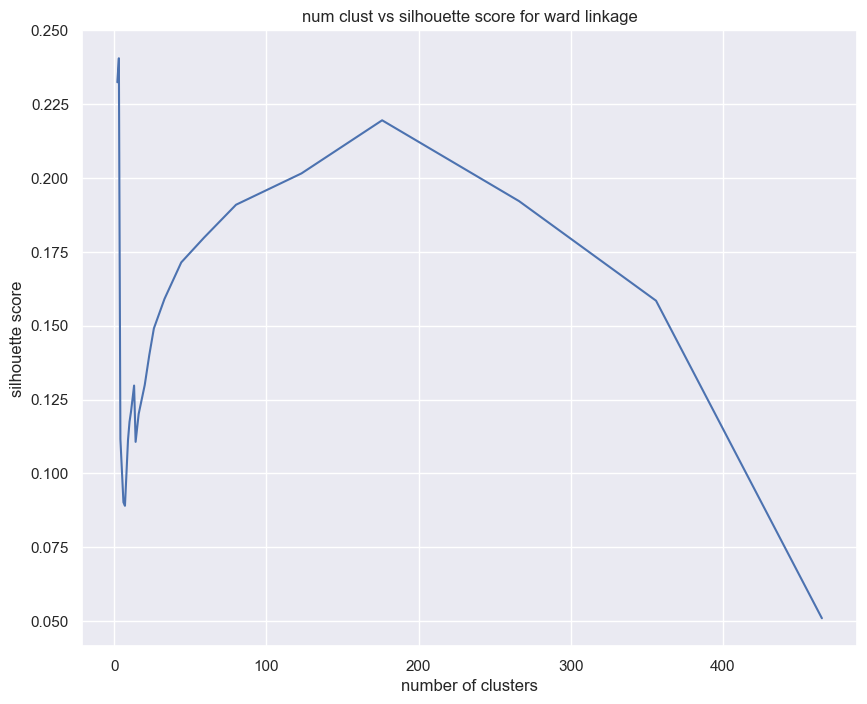

In [70]:

plt.plot(price_corr_eval['num clusters'], price_corr_eval['Silhouette'])

# Add labels and title
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.title('num clust vs silhouette score for ward linkage')

doing a close up at silhouette vs num of clusters for 1<= num_clusters <=20

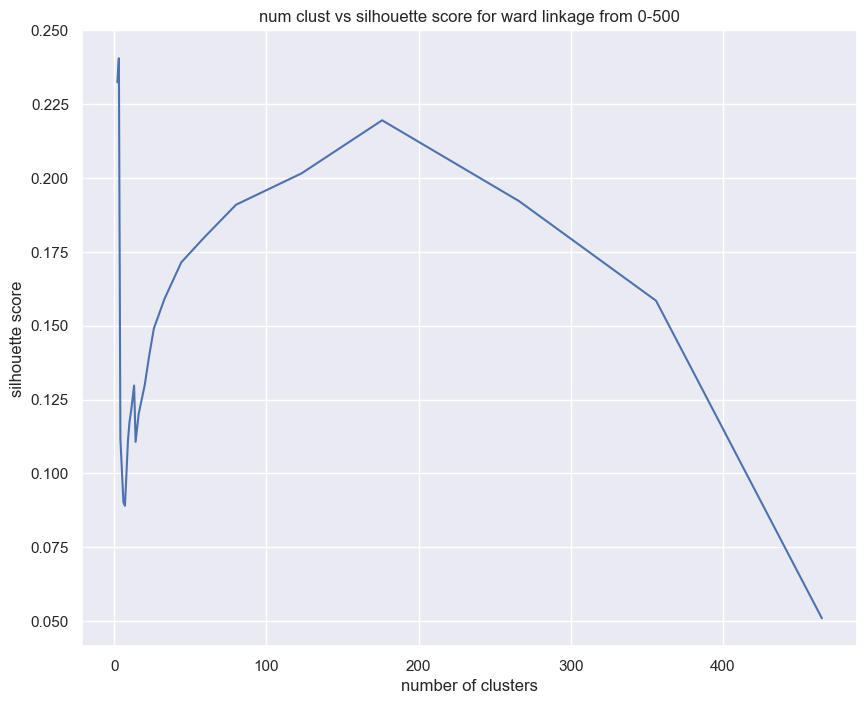

In [71]:

plt.plot(price_corr_eval['num clusters'], price_corr_eval['Silhouette'])

# Add labels and title
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.title('num clust vs silhouette score for ward linkage from 0-500')
plt.show()

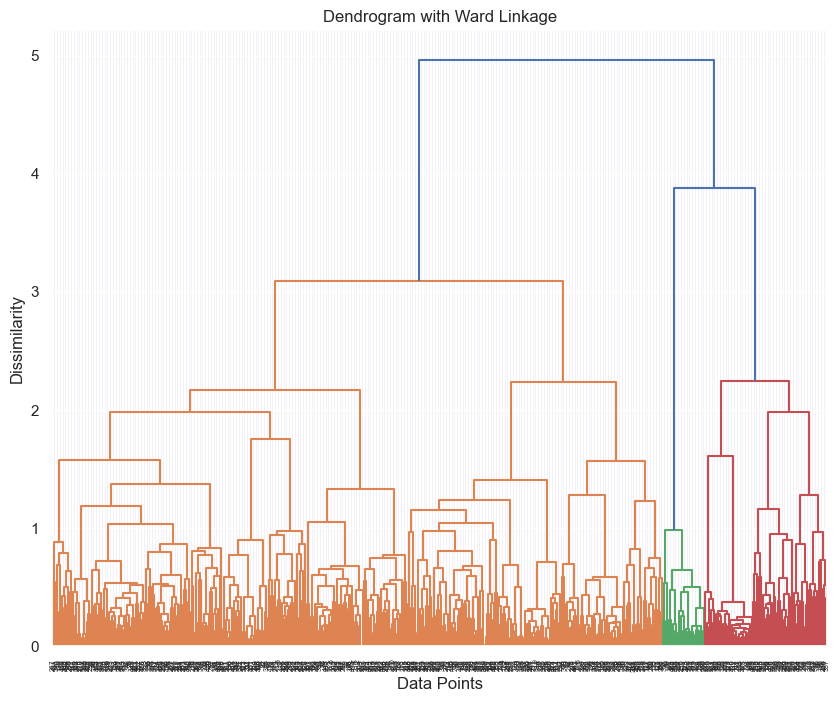

There are 3 clusters and these are the sizes of each [392, 27, 79]


In [72]:
Z = linkage(squareform(dissimilarity), method="ward", optimal_ordering=True)

dendrogram = sch.dendrogram(Z)  # Changed sch.dendrogram to dendrogram
plt.xlabel('Data Points')
plt.ylabel('Dissimilarity')
plt.title('Dendrogram with Ward Linkage')
plt.show()

labels = fcluster(Z, 3.5, criterion='distance')
silhouette_avg = silhouette_score(dissimilarity, labels, metric='precomputed')  # Changed silhouette_avg function
num_clusters = len(set(labels))

unique_labels = np.unique(labels)
cluster_sizes = [np.sum(labels == label) for label in unique_labels]

# Calculate the ratio of cluster sizes
size_ratio = max(cluster_sizes) / min(cluster_sizes)
print('There are', max(labels), 'clusters and these are the sizes of each', cluster_sizes)


In [73]:
df_labels = pd.DataFrame({'Company': df_price_pct.columns, 'Cluster_Label': labels})
df_labels

Company  Cluster_Label
0          A              1
1        AAL              1
2       AAPL              1
3       ABBV              3
4       ABNB              1
..       ...            ...
493      ZBH              1
494     ZBRA              1
495     ZION              1
496      ZTS              1
497  average              1

[498 rows x 2 columns]

In [88]:
csv_file_path = 'sofia_data/df_labels.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(csv_file_path), exist_ok=True)

# Save DataFrame to CSV
df_labels.to_csv(csv_file_path, index=False)

In [74]:
print(dissimilarity)

[[0.         0.5922909  0.34492053 ... 0.51354135 0.28296631 0.23506676]
 [0.5922909  0.         0.42193379 ... 0.4456072  0.6079469  0.30894827]
 [0.34492053 0.42193379 0.         ... 0.43787076 0.33061377 0.18190619]
 ...
 [0.51354135 0.4456072  0.43787076 ... 0.         0.52732228 0.2664646 ]
 [0.28296631 0.6079469  0.33061377 ... 0.52732228 0.         0.27267631]
 [0.23506676 0.30894827 0.18190619 ... 0.2664646  0.27267631 0.        ]]


In [75]:
'''
Z = linkage(squareform(dissimilarity), method="ward", optimal_ordering=True)
labels = fcluster(Z, 3.5, criterion='distance')
plt.scatter(dissimilarity[:, 0], dissimilarity[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Hierarchical Clustering Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')'''

'\nZ = linkage(squareform(dissimilarity), method="ward", optimal_ordering=True)\nlabels = fcluster(Z, 3.5, criterion=\'distance\')\nplt.scatter(dissimilarity[:, 0], dissimilarity[:, 1], c=labels, cmap=\'viridis\', edgecolors=\'k\', s=50)\nplt.title(\'Hierarchical Clustering Scatter Plot\')\nplt.xlabel(\'Feature 1\')\nplt.ylabel(\'Feature 2\')'

<h1>this is still kinda extreme inbalance</h1>

because one cluster has 253 samples in it which is pretty imbalanced

<h1>Silhouette Plot</h1>
visualizing what the clusters look like for each number of clusters possible
i keep finding that less clusters, the better the silhouette score
on that y axis each number is like a sample

Silhouette Score: 0.36185123862927243
[1 1 1 3 1 1 1 1 1 1 2 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1
 1 2 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 2 1 3 1 1 1 1 1 1 1
 3 3 1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 1 3 1 3 3 1 1 1 1 1 3 3 3 1 1 2 3 1 3 1
 1 1 1 1 1 1 1 1 2 1 1 3 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 2 1 1 1
 1 3 1 1 3 1 3 1 1 1 2 1 1 1 2 3 1 1 3 1 3 1 3 1 1 1 1 2 1 1 1 1 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 3 1 1 1 1
 1 3 1 1 3 1 3 1 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 3 1
 1 3 1 1 3 2 1 3 1 1 3 1 1 3 1 1 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1
 1 1 1 1 3 1 1 1 1 1 3 3 2 2 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 3 3 3 1 3 1 1 1 1 1 3 1
 1 3 1 1 1 3 1 1 2 1 1 2 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3
 2 1 1 3 1 1 3 1 1 1 1 3 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 2 1 1 1 3 1 1 3 1 1 1 1 1

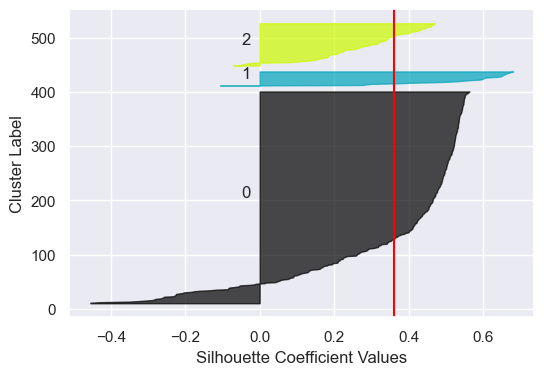

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Example data (replace with your own data)


# Hierarchical clustering
distance_threshold = 3.5
# Perform hierarchical clustering
#hierarchical_clustering = AgglomerativeClustering(n_clusters = None, distance_threshold = distance_threshold, linkage = 'ward')
#cluster_labels = hierarchical_clustering.fit_predict(dissimilarity)
Z_final = linkage(squareform(dissimilarity), method="ward", optimal_ordering=True)
labels_final = fcluster(Z, distance_threshold, criterion='distance')

# Compute the silhouette score for the clustering
silhouette_avg = silhouette_score(dissimilarity, labels_final)
print("Silhouette Score:", silhouette_avg)

# Compute silhouette scores for each data point
sample_silhouette_values = silhouette_samples(dissimilarity, labels_final)
#print(sample_silhouette_values)
# start plotting
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 4)
print(labels_final)

y_lower = 10  # Initial value for the lower y-axis

for i in range(max(labels_final)):
    ith_cluster_silhouette_values = sample_silhouette_values[labels_final - 1 == i]

    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / max(labels_final))
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

# Set axis labels and a vertical line representing the average silhouette score
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.axvline(x=silhouette_avg, color="red")

plt.show()

<h3>How to determine which method to get the number of clusters</h3>
okay so u cant use elbow method for heriarchical clustering (only kmeans) 
for heirarhcical clustering u can do silhouette score or cophenetic correlation

<b>sihouette score</b>
measures the quality of clusters. it quantiifes how similar a point is to its own cluster compared to other clusters

Silhouette Score = (b-a)/max(a,b)

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.



<b>Cophenetic Correlation</b>

Takes the original dissimilarity (or distance) matrix then calcluates a cohpenic matrix. The cohpenic matrix measures the heights on the dendrogram where each company is joined at to see if the distances between company joins are similar to the original company distances in the original distance matrix.

Then you get the correlation between the two matrices if the score is higher then the clusters are more representative of the data

The cophenic correlation matrix represents the distances between all pairs of data points in the dendrogram. It essentially measures the height at which two data points are joined in the tree.

basically u want to see if the heirarchical clusters represent the actual similarity matrix



<b>pdist</b>
pdist() finds pairwise distances between each companies so that highly correlated companies are closer together




In [77]:

#if its a disimilary matrix then shouldn't the threshold be set to lower, like if u want the clusters to be merged 
#they should have low disimilary right? thats wrong but idk why

#threshold means diff things depending on the cirterion used in fcluster
# for distnance:  observations in each flat cluster have no greater a cophenetic distance than T


#fcluster assings data points to the clusters doesn't acutally make the clusters so im a bit confused why its really needed if the dataset is the same
#may just be needed to get the dictinoaty of labels easier





In [78]:

print('hello')

hello


Cutting the dendrogram and visuzalizing it in a 2d space

using dimensionality reduction, tries to keep the pairwise distance as accurate as possible

ValueError: 'c' argument has 498 elements, which is inconsistent with 'x' and 'y' with size 497.

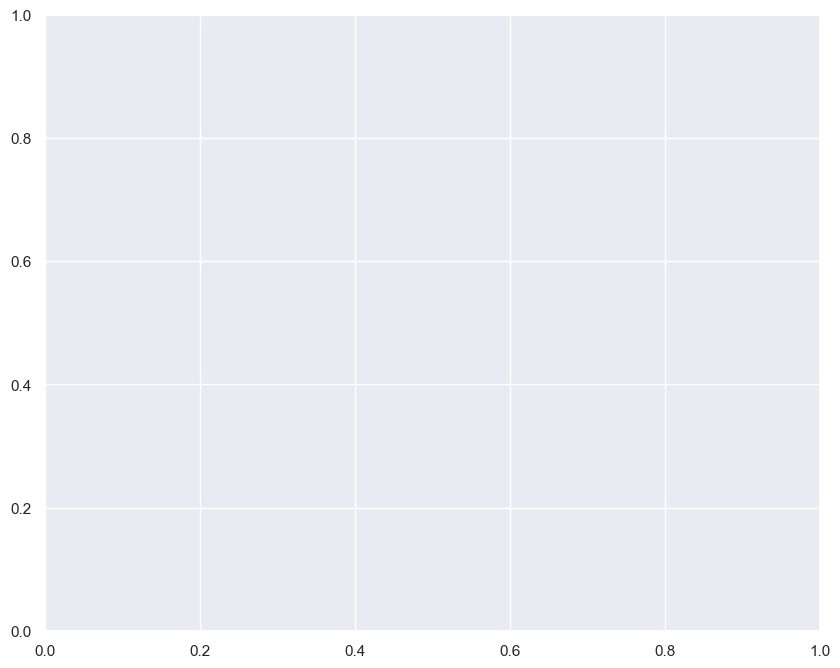

In [79]:
from scipy.cluster.hierarchy import fcluster
#t=400
#clusters = fcluster(linkage_matrix, t, criterion='distance')
'''
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=0)#so this is dimensionality reduction
#metric mds 
#also im using euclidean as dissimilarity attr but idk why i just wanted to keep it consistentt u can also do "precomputed"A.csv

x_y = mds.fit_transform(Z)
x = x_y[:, 0]
y = x_y[:, 1]
plt.scatter(x, y, c=labels, cmap='Blues')  #i dont really like this cmap but whatever
plt.show()'''

x = Z[:, 0]
y = Z[:, 1]

plt.scatter(x,y, c=labels, cmap="Blues")




<h1>Where do we go from here </h1>
okay so u need to find out if using agglomerative cluster() with distancethreshold specified gives different/better? results than making Z and fcluster separately
how does nora determine the clusters does she use maxclust// should she use maxclust or find a threshold to cut at

<H1>Make it interactive again</h1>
im going to try and make the clusters into a plotly graph, ideally it wouldnt be the points but like blobs but baby steps baby steps\

so i dont need edge traces

In [ ]:
node_text = []
for i in range(0,len(clusters)):
    node_text.append('cluster number ' +str(clusters[i]))
print(node_text)

NameError: name 'clusters' is not defined

In [ ]:
node_x = []
node_y = []

for index in range(0,len(x_y)):
    node_x.append(x_y[index, 0])
    node_y.append(x_y[index,1])

In [ ]:
val_map_clusters = {
    1: 'red',
    2: 'green',
    3: 'pink',
    4: 'cyan',
}
node_colors_clusters = [val_map_clusters.get(clusters[i]) for i in range(0,len(clusters))]
#okay so now my problem is that accd to color maps theres only 3 clusters

In [ ]:
node_traces = []
for i in range(0,len(clusters)):
    trace = go.Scatter(
        x=[node_x[i]],
        y=[node_y[i]],
        mode='markers',
        marker=dict(
            size=10,  # Adjust the size as needed
            color=node_colors_clusters[i],  # Use the attribute value as the color
            #colorscale='Reds',  # Use a colormap
            #showscale=True,  # Show color scale
            #colorbar=dict(title='cluster number'),  # Color bar title
        ),
        showlegend= False,
        text=node,  # Node label
    )
    node_traces.append(trace)

In [ ]:
fig = go.Figure(data=node_traces)

# Customize the layout if needed
fig.update_layout(
    title='Clusters',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
)

# Show the figure
fig.show()

<h1> Where to go from here </h1>

okay so theres 500 pts in the cluster graph and there's 151 nodes in the other plotly graph, i think i need to cluster based on the networkx which wont be heirarchical clustering itll be community based (spectral laouvian) but that way i can set a custom color map for the clusters,,and make sector either an embedded attribute orrrrrr do an overlay but that seems complicated

i could make the node attribute like an embedded numeric value and use it to base my clustering off of i think


okaokyaokyokayalalllalalalalala

make 2 plotly graphs one where u cluster based on correlation (like aboce) abnd then one graph where its clustered based on categorical varialbe
change clustering to using a disimiarlty matrix based on correlation instead of distance (y axis on dendrogram should be correlation not distance)

for price prediction use XGBoost but i dont really want to deal w that at the moment

i need to do a little more w the flcuster method